# Aim: Predict whether income exceeds 50K/yr based on census data.

In [168]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [169]:
# Read data
column_header = ['Age','WorkClass','fnlwgt','Education','EducationNum','MaritalStatus','Occupation',
                 'Relationship','Race','Sex','CapitalGain','CapitalLoss','HrsPerWeek','NativeCountry', '<=50k>=50k']
df = pd.read_csv('data/adult.data')
df.columns = column_header

In [170]:
df.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HrsPerWeek,NativeCountry,<=50k>=50k
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [171]:
# remove whitespace from dataframe
new_df = df.applymap(lambda x: x.strip() if type(x)==str else x)

In [172]:
# export new csv to file
new_df.to_csv('data/adult_data_without_whitespace.csv', index=False)

In [173]:
# Import new data
adult_df = pd.read_csv('data/adult_data_without_whitespace.csv')
adult_df.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HrsPerWeek,NativeCountry,<=50k>=50k
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [174]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            32560 non-null  int64 
 1   WorkClass      32560 non-null  object
 2   fnlwgt         32560 non-null  int64 
 3   Education      32560 non-null  object
 4   EducationNum   32560 non-null  int64 
 5   MaritalStatus  32560 non-null  object
 6   Occupation     32560 non-null  object
 7   Relationship   32560 non-null  object
 8   Race           32560 non-null  object
 9   Sex            32560 non-null  object
 10  CapitalGain    32560 non-null  int64 
 11  CapitalLoss    32560 non-null  int64 
 12  HrsPerWeek     32560 non-null  int64 
 13  NativeCountry  32560 non-null  object
 14  <=50k>=50k     32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [175]:
adult_df.shape

(32560, 15)

In [176]:
adult_df.describe()

,Age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HrsPerWeek
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [177]:
adult_df['<=50k>=50k'].value_counts()

<=50K    24719
>50K      7841
Name: <=50k>=50k, dtype: int64

In [178]:
adult_df.isna().sum()

Age              0
WorkClass        0
fnlwgt           0
Education        0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Sex              0
CapitalGain      0
CapitalLoss      0
HrsPerWeek       0
NativeCountry    0
<=50k>=50k       0
dtype: int64

There are no missing data (meaning no NaN values) but we have some missing data represented with '?'

In [179]:
adult_df.loc[60], adult_df.loc[68]

(Age                                 32
 WorkClass                            ?
 fnlwgt                          293936
 Education                      7th-8th
 EducationNum                         4
 MaritalStatus    Married-spouse-absent
 Occupation                           ?
 Relationship             Not-in-family
 Race                             White
 Sex                               Male
 CapitalGain                          0
 CapitalLoss                          0
 HrsPerWeek                          40
 NativeCountry                        ?
 <=50k>=50k                       <=50K
 Name: 60, dtype: object,
 Age                         25
 WorkClass                    ?
 fnlwgt                  200681
 Education         Some-college
 EducationNum                10
 MaritalStatus    Never-married
 Occupation                   ?
 Relationship         Own-child
 Race                     White
 Sex                       Male
 CapitalGain                  0
 CapitalLoss          

To fill them with NaN so pandas can recognize them as null data

In [180]:
for i in adult_df:
    adult_df[i] = adult_df[i].replace('?', np.nan)
    print(i)

Age
WorkClass
fnlwgt
Education
EducationNum
MaritalStatus
Occupation
Relationship
Race
Sex
CapitalGain
CapitalLoss
HrsPerWeek
NativeCountry
<=50k>=50k


In [181]:
# To confirm that they have been replaced with NaN, let's view index 60 and 68
adult_df.loc[60], adult_df.loc[68]

(Age                                 32
 WorkClass                          NaN
 fnlwgt                          293936
 Education                      7th-8th
 EducationNum                         4
 MaritalStatus    Married-spouse-absent
 Occupation                         NaN
 Relationship             Not-in-family
 Race                             White
 Sex                               Male
 CapitalGain                          0
 CapitalLoss                          0
 HrsPerWeek                          40
 NativeCountry                      NaN
 <=50k>=50k                       <=50K
 Name: 60, dtype: object,
 Age                         25
 WorkClass                  NaN
 fnlwgt                  200681
 Education         Some-college
 EducationNum                10
 MaritalStatus    Never-married
 Occupation                 NaN
 Relationship         Own-child
 Race                     White
 Sex                       Male
 CapitalGain                  0
 CapitalLoss          

In [182]:
# We now see that they have been replaced with NaN so pandas coud detect them as missing value
missing = adult_df.isna().sum()
missing

Age                 0
WorkClass        1836
fnlwgt              0
Education           0
EducationNum        0
MaritalStatus       0
Occupation       1843
Relationship        0
Race                0
Sex                 0
CapitalGain         0
CapitalLoss         0
HrsPerWeek          0
NativeCountry     583
<=50k>=50k          0
dtype: int64

In [183]:
# What percentage of our data is missing?
missing_percentage = (missing.sum()/len(adult_df)) * 100
missing_percentage

13.089680589680588

13% of our data is missing

Why are the data missing? Were they not available or were they ommited? Should we ignore them? we can't afford to lose 13% of our data

In [185]:
# For the NativeCountry column, it's obvious they were ommited because everyone should have a native country
adult_df['NativeCountry'].value_counts()

United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

Majority of the people have United-States as their native country so we assume the people without native country recorded are from United-States.
So we fill them with United-States

Let's assume that the missing occupation is in the others category and fill that too

In [186]:
adult_df['NativeCountry'] = adult_df['NativeCountry'].fillna('United-states')
adult_df['Occupation'] = adult_df['Occupation'].fillna('Other-service')

In [187]:
adult_df.isna().sum()

Age                 0
WorkClass        1836
fnlwgt              0
Education           0
EducationNum        0
MaritalStatus       0
Occupation          0
Relationship        0
Race                0
Sex                 0
CapitalGain         0
CapitalLoss         0
HrsPerWeek          0
NativeCountry       0
<=50k>=50k          0
dtype: int64

In [188]:
# How many % of our data is missing after that
(adult_df.isna().sum().sum()/len(adult_df)) * 100

5.638820638820639

In [189]:
# Let's drop the people without a work class which corresponds to 5% of our data
adult_df.dropna(subset=['WorkClass'], inplace=True)

In [190]:
(adult_df.isna().sum().sum()/len(adult_df)) * 100

0.0

We have no missing data now

In [191]:
adult_df.rename(columns={'<=50k>=50k': 'Target'}, inplace=True)

# Data Analysis

In [192]:
# Age of those working above the regular 40hrs per week
above_40hrs_df = adult_df[adult_df['HrsPerWeek']>40]
above_40hrs_df.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HrsPerWeek,NativeCountry,Target
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
12,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
14,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K


In [193]:
np.max(above_40hrs_df['Age'])

90

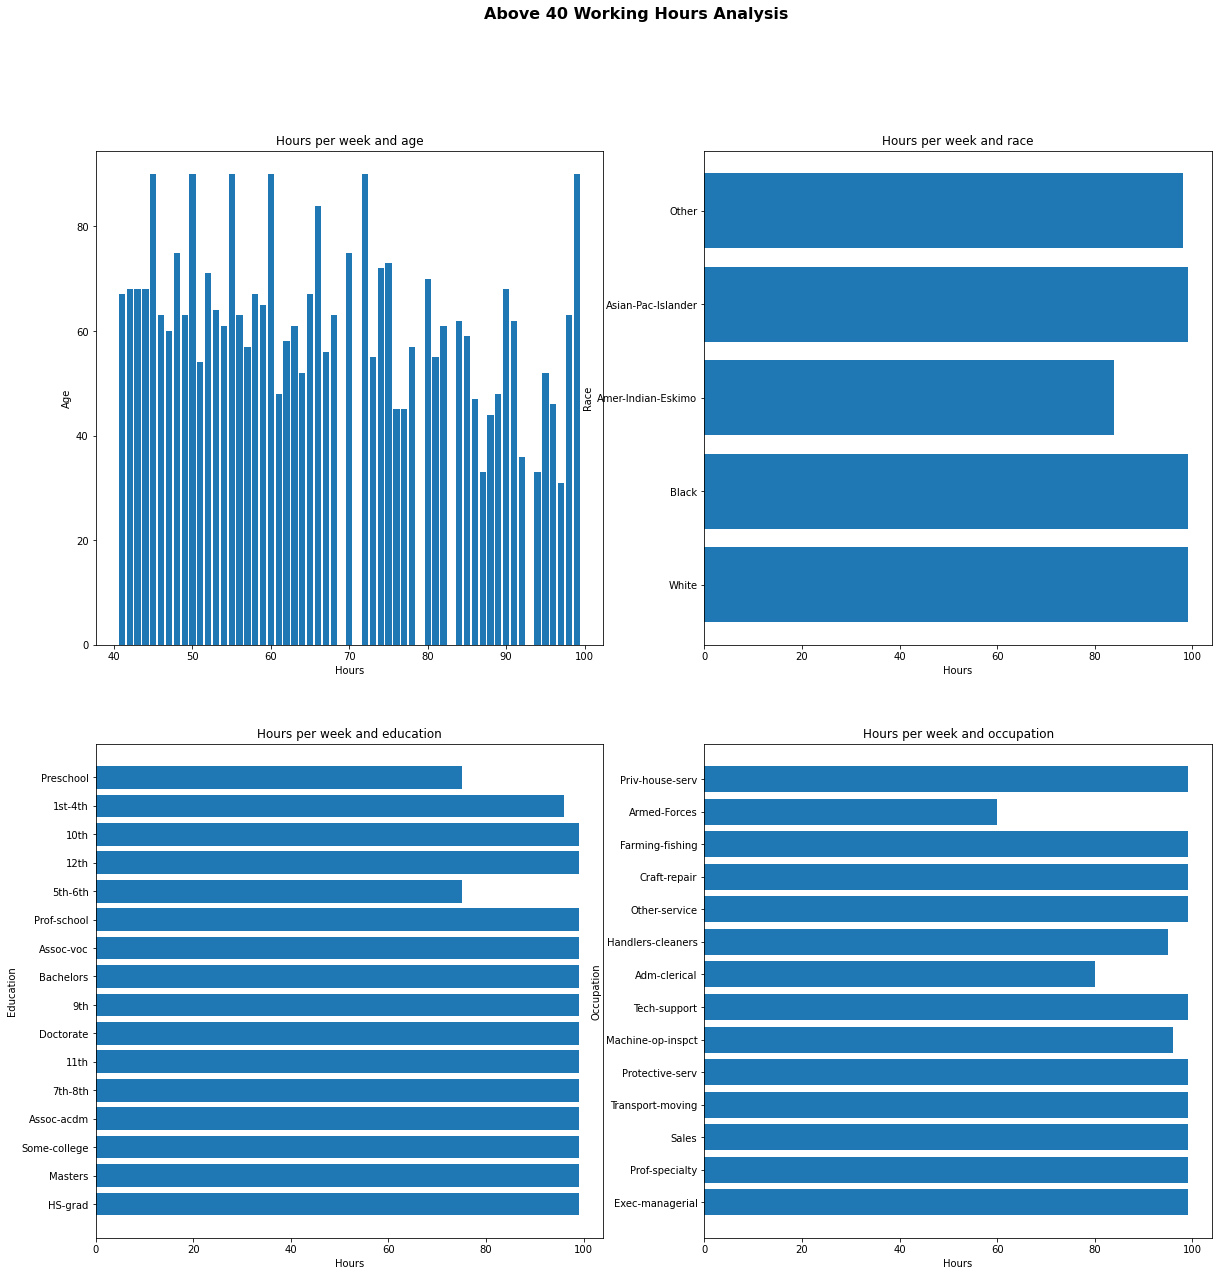

In [194]:
# Let's plot the graph of that data
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
bar = ax1.bar(x=above_40hrs_df['HrsPerWeek'], height=above_40hrs_df['Age'])
barh = ax2.barh(y=above_40hrs_df['Race'], width=above_40hrs_df['HrsPerWeek'])
barh1 = ax3.barh(y=above_40hrs_df['Education'], width=above_40hrs_df['HrsPerWeek'])
barh2 = ax4.barh(y=above_40hrs_df['Occupation'], width=above_40hrs_df['HrsPerWeek'])

ax1.set(title='Hours per week and age',
        xlabel='Hours',
        ylabel='Age')
ax2.set(title='Hours per week and race',
        xlabel='Hours',
        ylabel='Race')
ax3.set(title='Hours per week and education',
        xlabel='Hours',
        ylabel='Education')
ax4.set(title='Hours per week and occupation',
        xlabel='Hours',
        ylabel='Occupation')
fig.suptitle('Above 40 Working Hours Analysis', fontsize=16, fontweight='bold');

# Creating a Model

we have a classification problem here. Let's apply `RandomForestClassifier` algorithm

In [196]:
# first, let's split our data into features and label
X = adult_df.drop('Target', axis=1)
y = np.array(adult_df['Target'])

In [197]:
adult_df.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HrsPerWeek,NativeCountry,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [198]:
# Convert to numerical data
categorical_features = ['WorkClass','Education','EducationNum','MaritalStatus','Occupation','Relationship','Race','Sex','NativeCountry']
X = pd.get_dummies(adult_df[categorical_features])
X.head().T

,0,1,2,3,4
EducationNum,13,9,7,13,14
WorkClass_Federal-gov,0,0,0,0,0
WorkClass_Local-gov,0,0,0,0,0
WorkClass_Never-worked,0,0,0,0,0
WorkClass_Private,0,1,1,1,1
...,...,...,...,...,...
NativeCountry_Trinadad&Tobago,0,0,0,0,0
NativeCountry_United-States,1,1,1,0,1
NativeCountry_United-states,0,0,0,0,0
NativeCountry_Vietnam,0,0,0,0,0


In [200]:
X = np.array(X)
X

array([[13,  0,  0, ...,  0,  0,  0],
       [ 9,  0,  0, ...,  0,  0,  0],
       [ 7,  0,  0, ...,  0,  0,  0],
       ...,
       [ 9,  0,  0, ...,  0,  0,  0],
       [ 9,  0,  0, ...,  0,  0,  0],
       [ 9,  0,  0, ...,  0,  0,  0]])

In [202]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

# split into test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier()

In [203]:
%%time 
clf.fit(X_train,y_train)

CPU times: user 2.57 s, sys: 0 ns, total: 2.57 s
Wall time: 2.58 s


RandomForestClassifier()

In [204]:
clf.score(X_test,y_test)

0.8275020341741253

In [205]:
from sklearn.neighbors import KNeighborsClassifier

knclf = KNeighborsClassifier()

In [206]:
%%time 
knclf.fit(X_train,y_train)

CPU times: user 533 ms, sys: 7 µs, total: 533 ms
Wall time: 536 ms


KNeighborsClassifier()

In [207]:
knclf.score(X_test,y_test)

0.8068348250610252